# Task 1: Deep Learing 

## Kick start
1. load packages
1. load image

In [1]:
from tensorflow.keras import *
import numpy as np


In [40]:
import tensorflow as tf

In [20]:
import matplotlib.pyplot as plt

In [28]:
from sklearn.model_selection import train_test_split

In [30]:
from sklearn.preprocessing import StandardScaler

In [19]:
path = "data/train_data_label.npz"
data = np.load(path)

X = data["train_data"]
y=data["train_label"]

print(X.shape)
print(y.shape)

(27455, 784)
(27455,)


## Visualize data

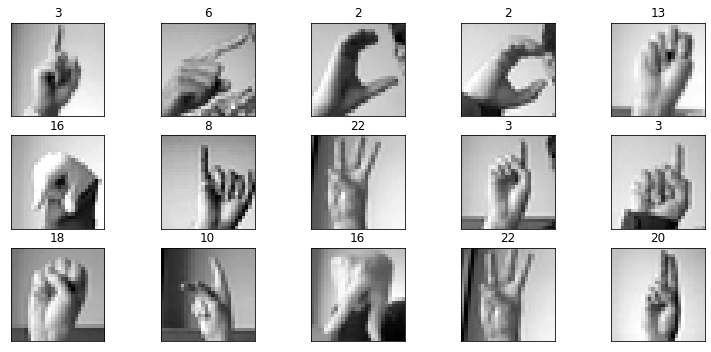

In [27]:
fig = plt.figure(figsize=(13,10))
for i in range(15):
    plt.subplot(5,5, i+1)
    plt.title(y[i])
    plt.imshow(np.reshape(X[i], (28,28)), cmap=plt.cm.gray)
    plt.xticks(()); plt.yticks(())

## Preprocess

In [74]:
from keras.utils import np_utils
## Train test split
X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.3, random_state=42)
y_train = np_utils.to_categorical(y_train)

## Normalization
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_eval = scaler.transform(X_eval)

## Base DL Model

In [61]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

input_dim = X_train.shape[1]
# Model definition
model = Sequential()
model.add(layers.Dense(64, activation='relu', input_dim=input_dim))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(25, activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                50240     
                                                                 
 dense_13 (Dense)            (None, 64)                4160      
                                                                 
 dense_14 (Dense)            (None, 25)                1625      
                                                                 
Total params: 56,025
Trainable params: 56,025
Non-trainable params: 0
_________________________________________________________________


In [62]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy', 
    metrics = 'accuracy')

model.fit(X_train, y_train, batch_size=16, epochs=20)

Epoch 1/20
1202/1202 [==============================] - 2s 1ms/step - loss: 0.5859 - accuracy: 0.8349
Epoch 2/20
1202/1202 [==============================] - 2s 1ms/step - loss: 0.0356 - accuracy: 0.9944
Epoch 3/20
1202/1202 [==============================] - 2s 1ms/step - loss: 0.0635 - accuracy: 0.9823
Epoch 4/20
1202/1202 [==============================] - 2s 1ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 5/20
1202/1202 [==============================] - 2s 1ms/step - loss: 7.4205e-04 - accuracy: 1.0000
Epoch 6/20
1202/1202 [==============================] - 2s 1ms/step - loss: 4.1733e-04 - accuracy: 1.0000
Epoch 7/20
1202/1202 [==============================] - 2s 1ms/step - loss: 2.3357e-04 - accuracy: 1.0000
Epoch 8/20
1202/1202 [==============================] - 2s 1ms/step - loss: 0.1241 - accuracy: 0.9764
Epoch 9/20
1202/1202 [==============================] - 2s 1ms/step - loss: 0.0028 - accuracy: 0.9997
Epoch 10/20
1202/1202 [==============================] - 2s 1ms/step -

## Prediction on eval set

In [75]:
predict_x_eval=model.predict(X_eval) 
y_pred=np.argmax(predict_x,axis=1)

In [76]:
y_pred

array([24,  8, 18, ...,  2, 12,  7])

In [77]:
y_eval

array([24,  8, 18, ...,  2, 12,  7])

In [79]:
from sklearn.metrics import accuracy_score
accuracy_score(y_eval, y_pred)

1.0